**Data Cleaning:**

In [15]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/matches.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Convert date column to datetime format with correct format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

**Exploratory Data Analysis (EDA):**

<ipython-input-14-345163b96b70>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
<ipython-input-14-345163b96b70>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
<ipython-input-14-345163b96b70>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
<ipython-input-14-345163b96b70>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

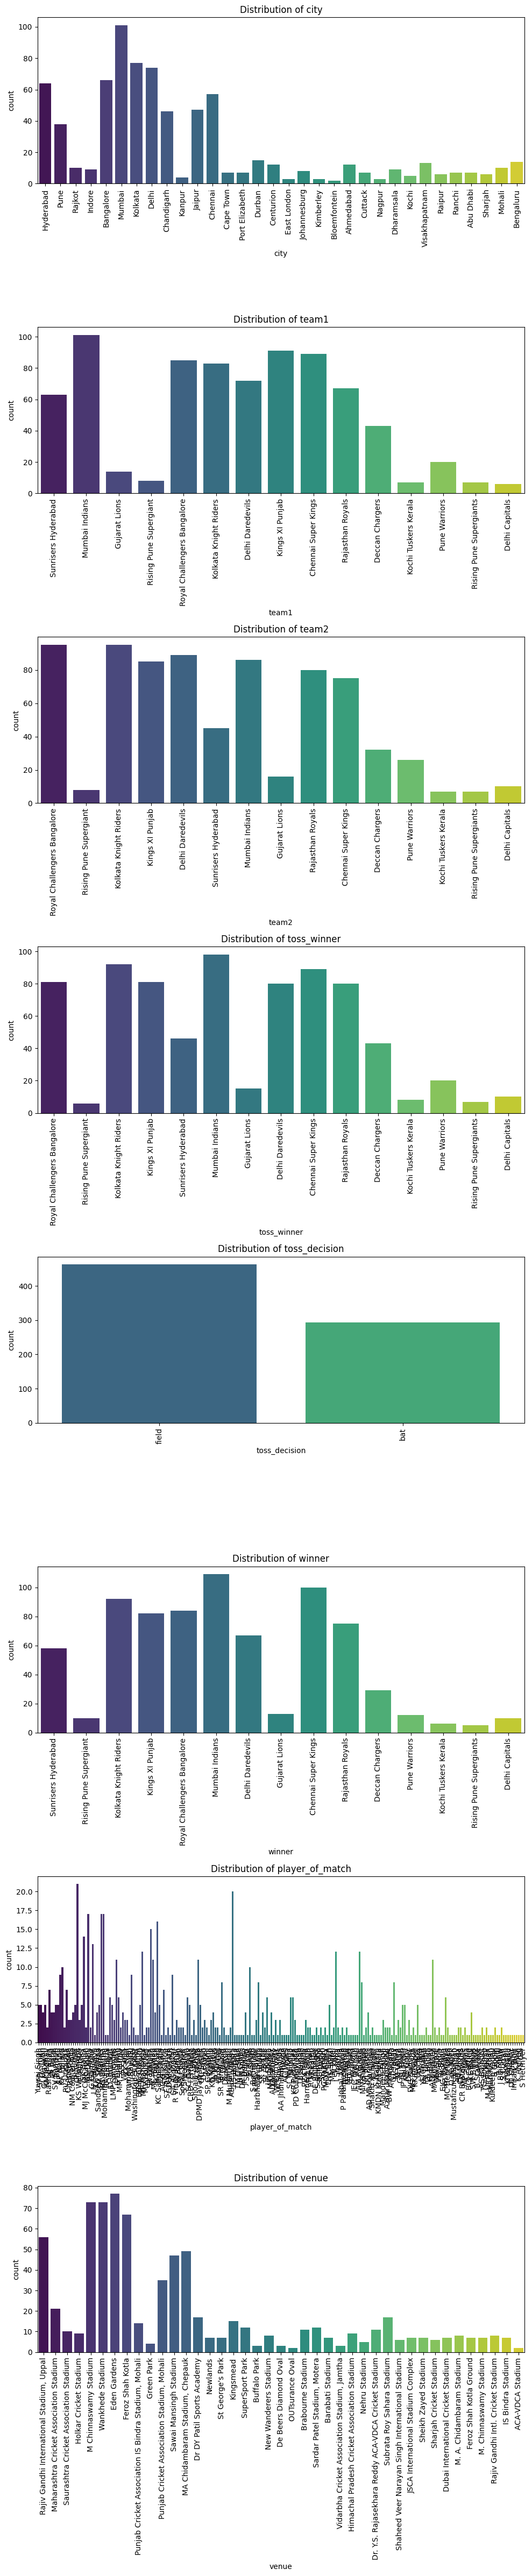

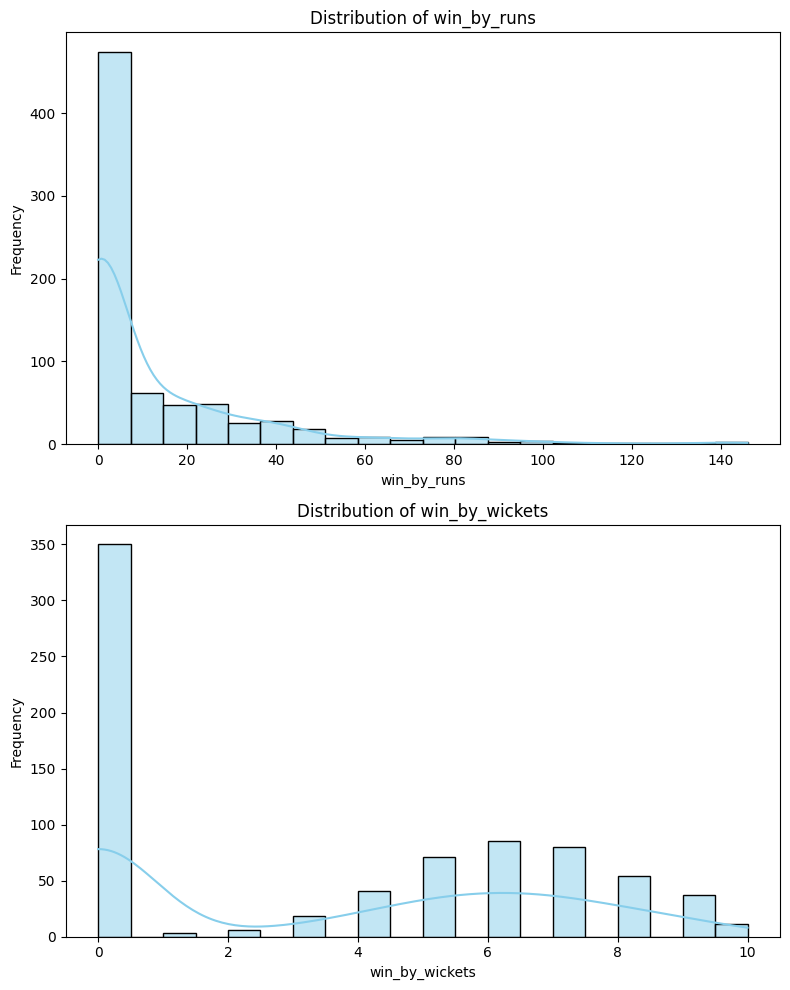

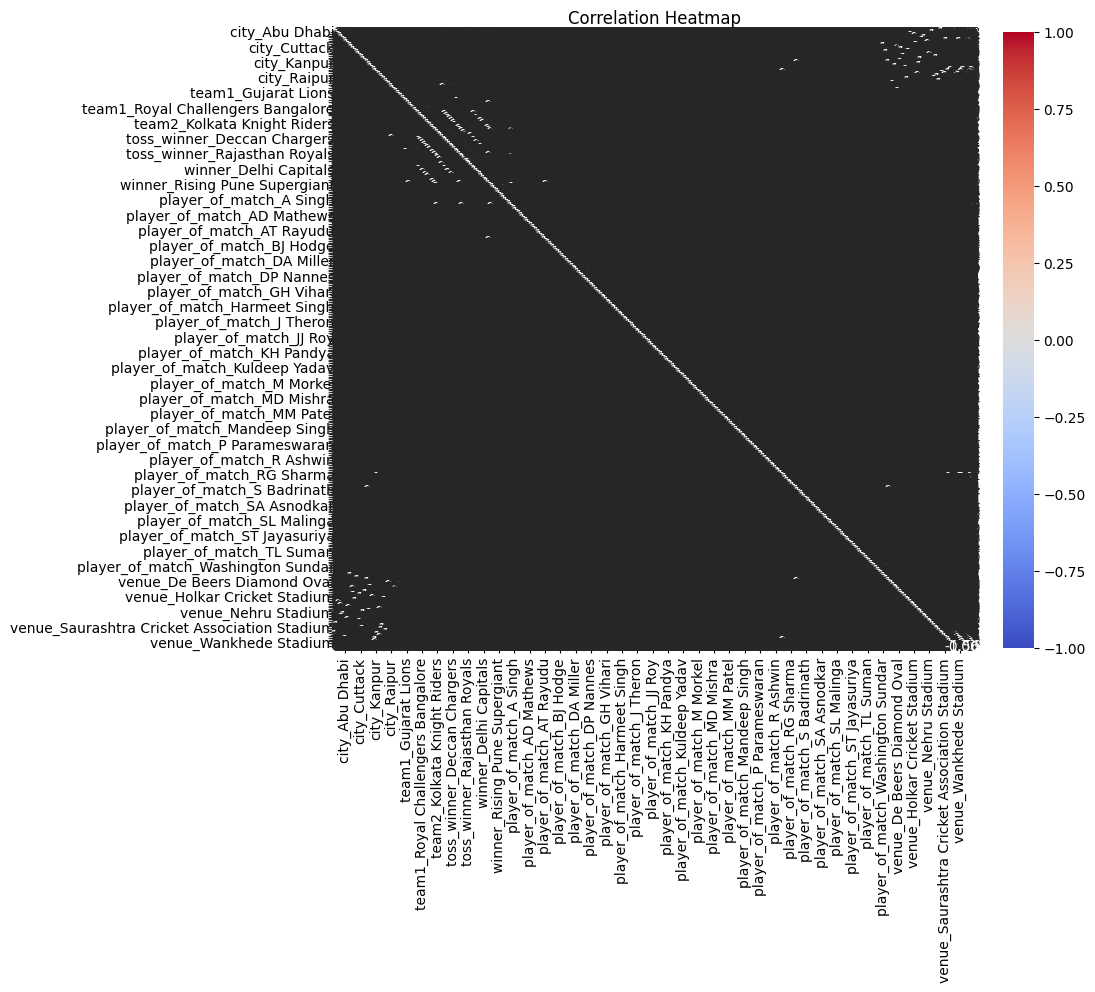

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the distribution of categorical variables
categorical_cols = ['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'player_of_match', 'venue']
num_categorical_cols = len(categorical_cols)
fig, axes = plt.subplots(num_categorical_cols, 1, figsize=(10, 6*num_categorical_cols))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Explore the distribution of numerical variables
numerical_cols = ['win_by_runs', 'win_by_wickets']
num_numerical_cols = len(numerical_cols)
fig, axes = plt.subplots(num_numerical_cols, 1, figsize=(8, 5*num_numerical_cols))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Box plots for numerical variables across different categories:**

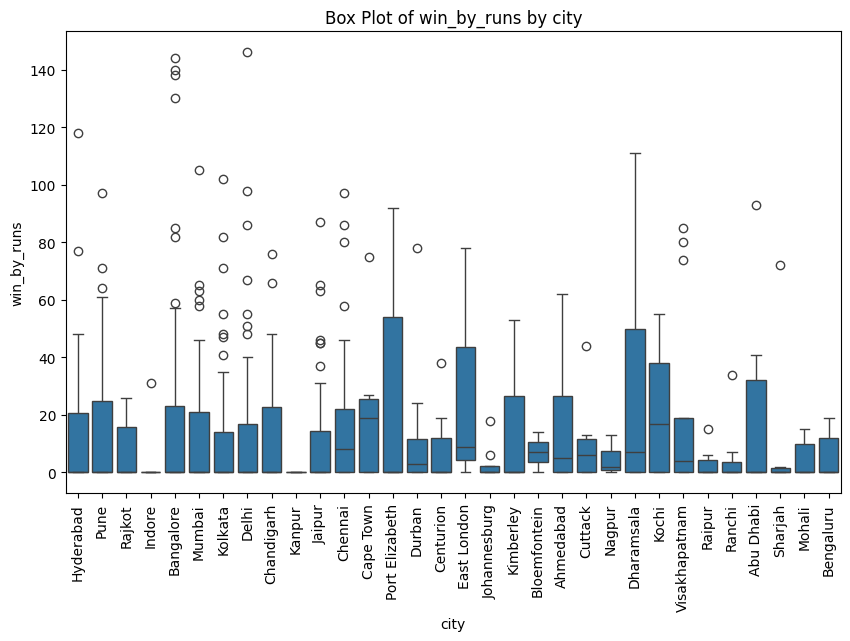

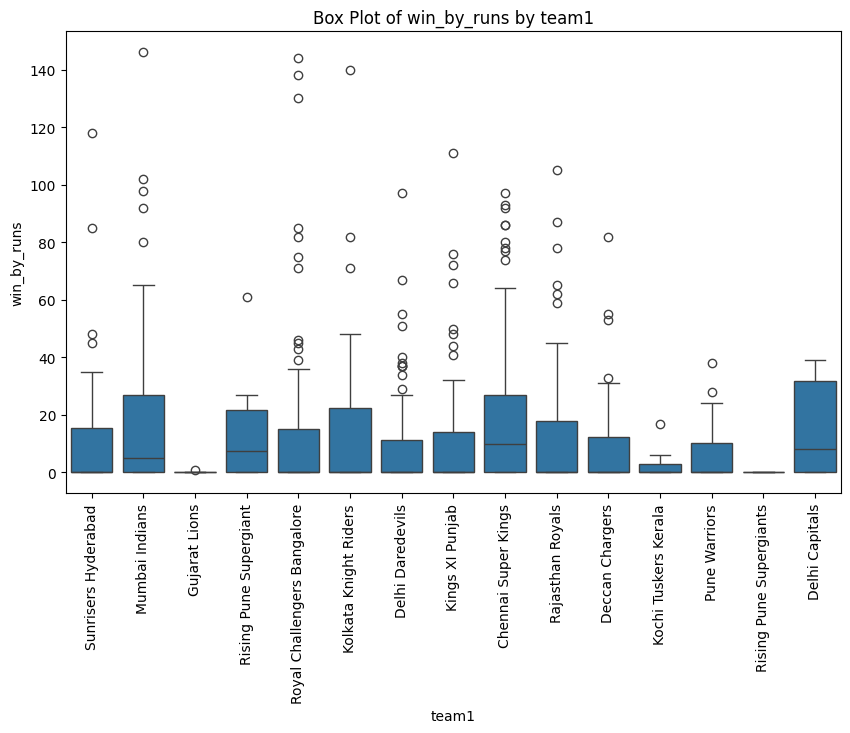

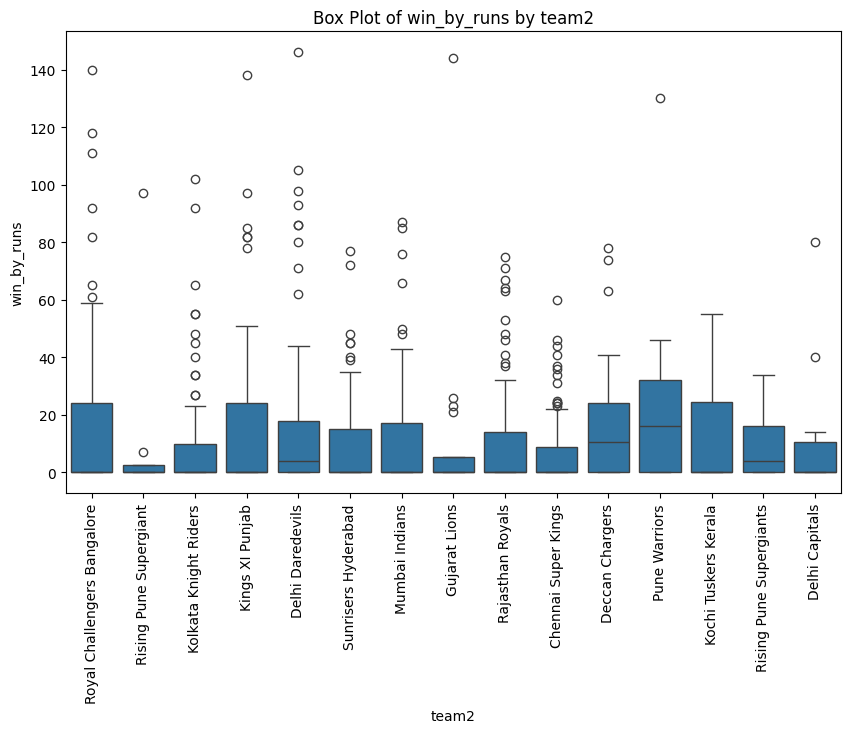

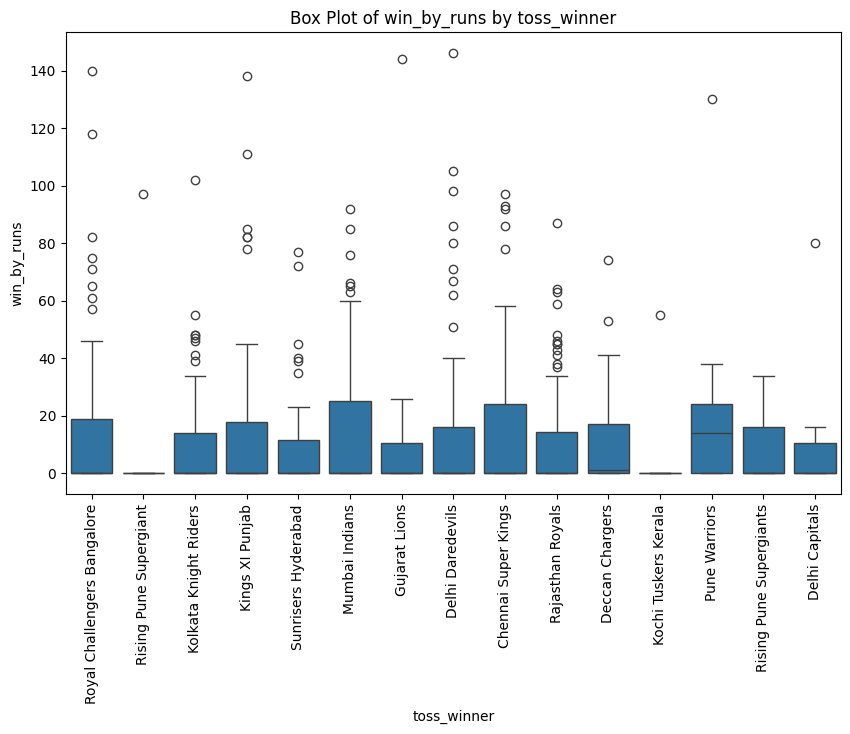

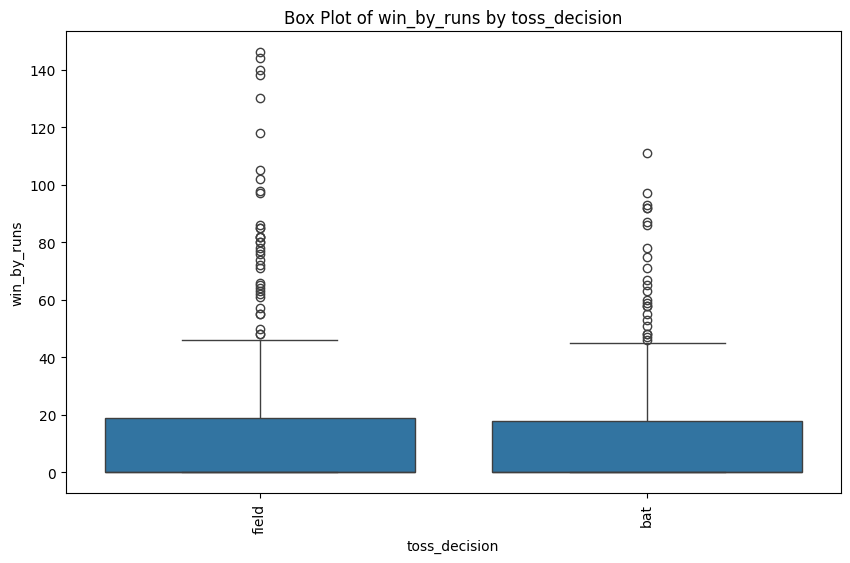

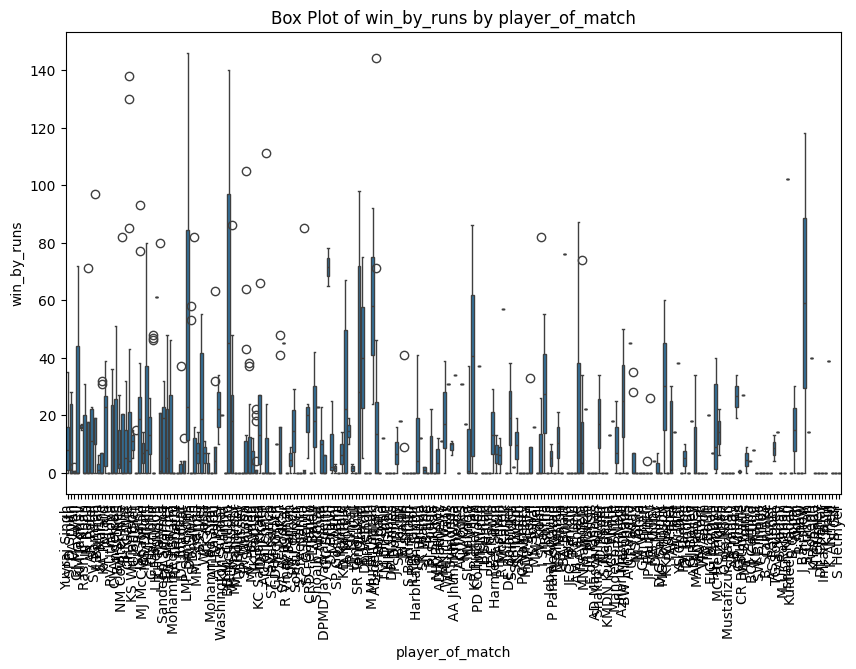

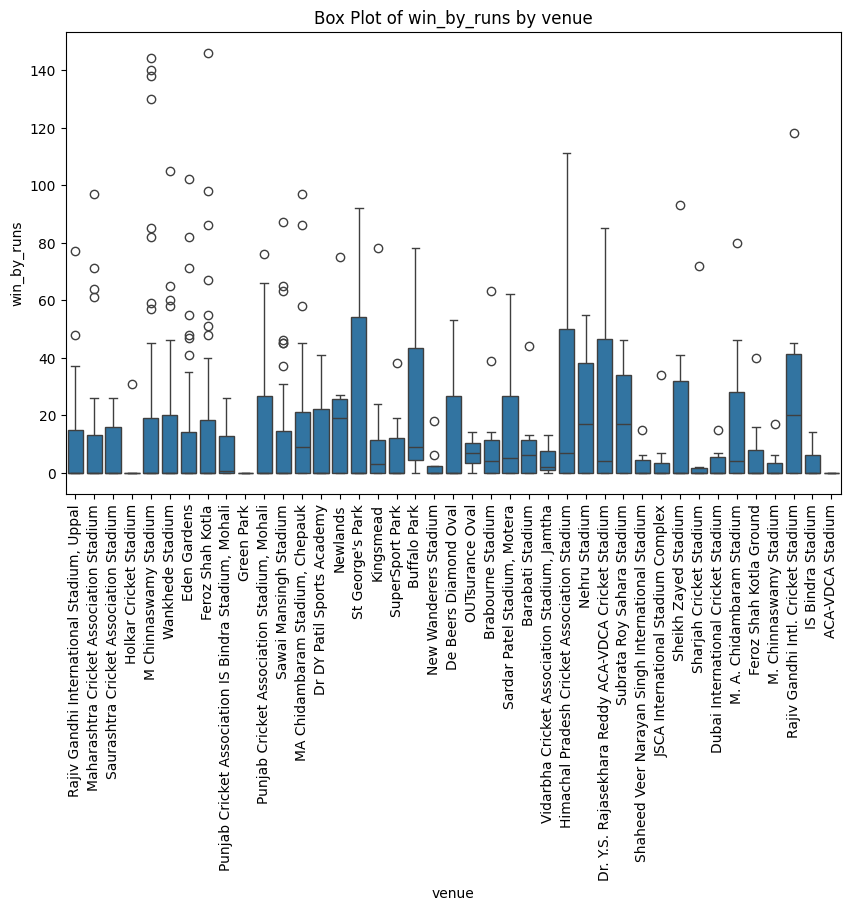

In [16]:
for col in categorical_cols:
    if col != 'winner':  # Exclude 'winner' as it's already included in the countplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y='win_by_runs', data=df)
        plt.xticks(rotation=90)
        plt.title(f'Box Plot of win_by_runs by {col}')
        plt.show()

**Bar plots for win_by_runs and win_by_wickets based on match outcome (win or loss):**

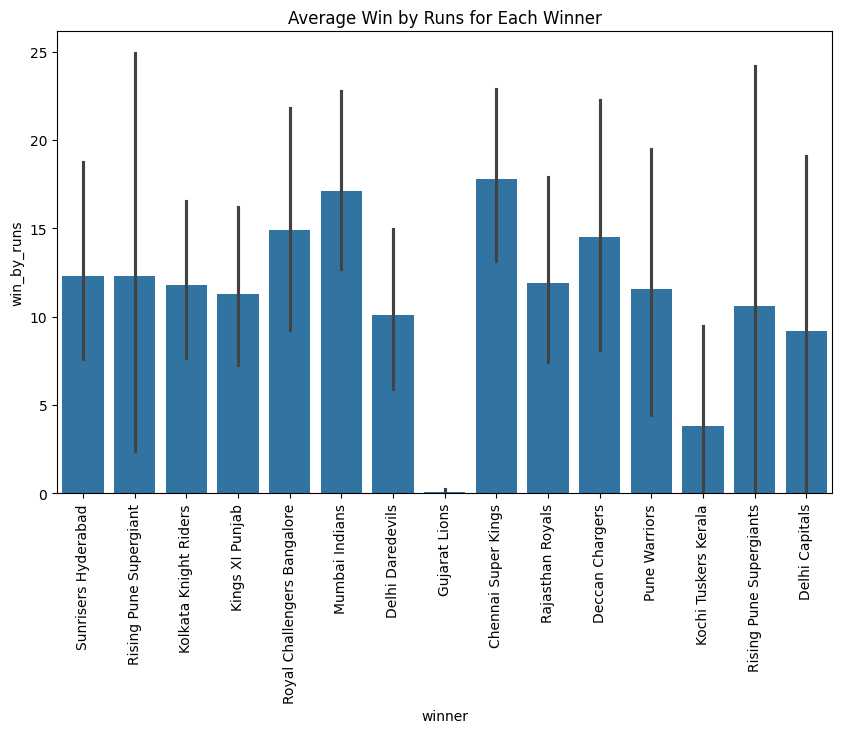

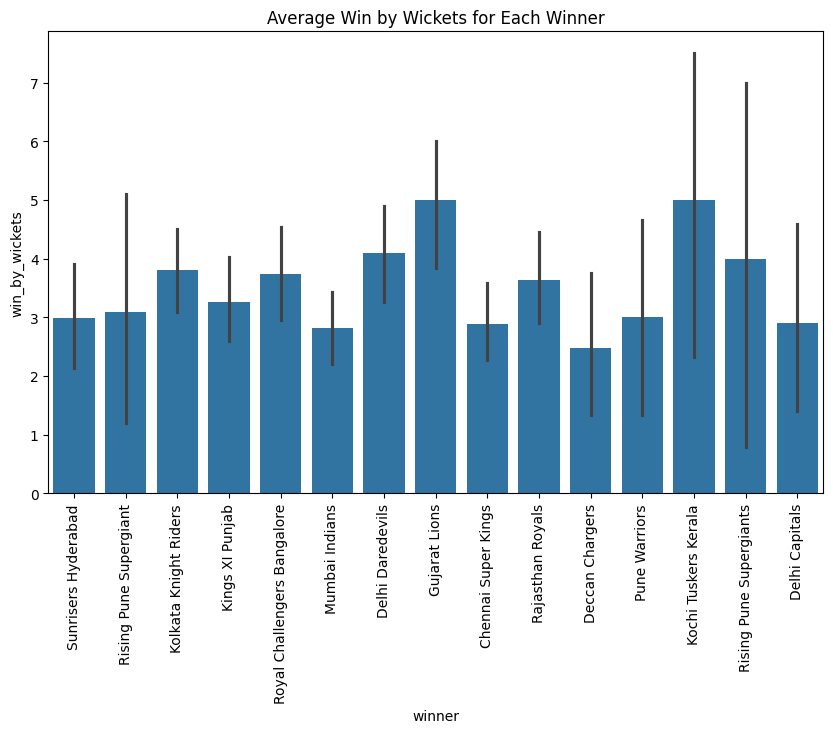

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='winner', y='win_by_runs', data=df)
plt.xticks(rotation=90)
plt.title('Average Win by Runs for Each Winner')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='winner', y='win_by_wickets', data=df)
plt.xticks(rotation=90)
plt.title('Average Win by Wickets for Each Winner')
plt.show()

**Pairplot for numerical variables:**

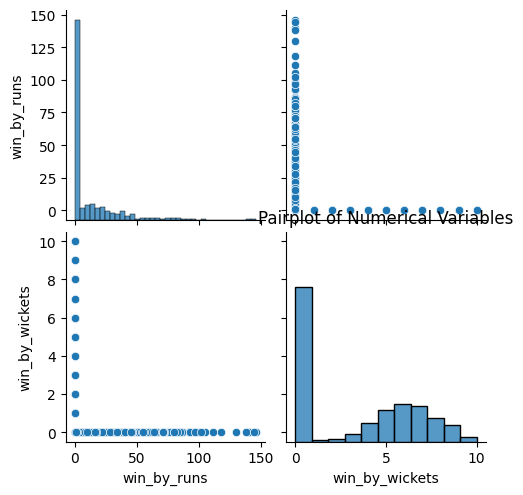

In [18]:
sns.pairplot(df[numerical_cols])
plt.title('Pairplot of Numerical Variables')
plt.show()


**Stacked bar plot for toss decision and match outcome:**

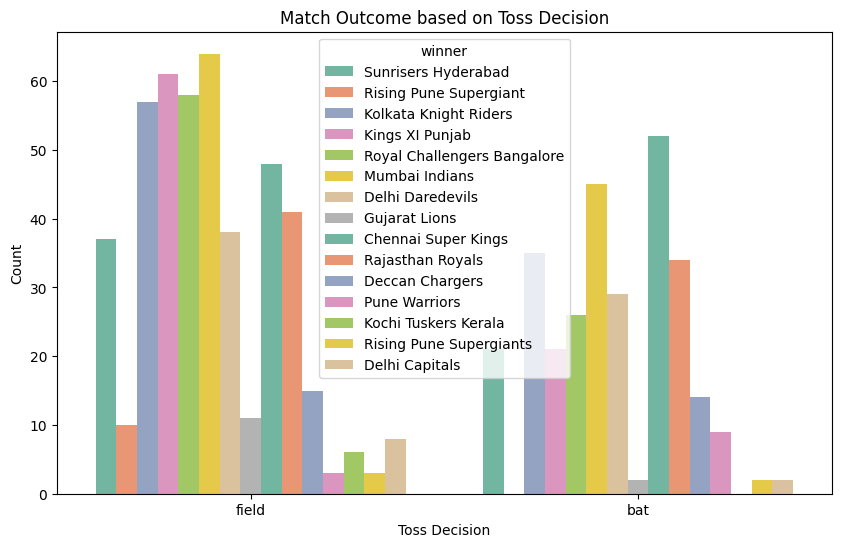

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_decision', hue='winner', data=df, palette='Set2')
plt.title('Match Outcome based on Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()
